# COLOUR SPACE VISUALIZATION

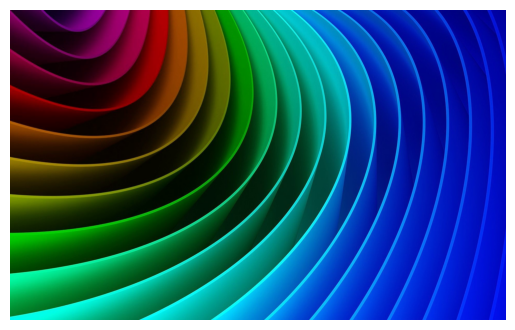

In [21]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\madhu\Downloads\R.jpeg")
plt.imshow(image)
plt.axis('off')
plt.show()

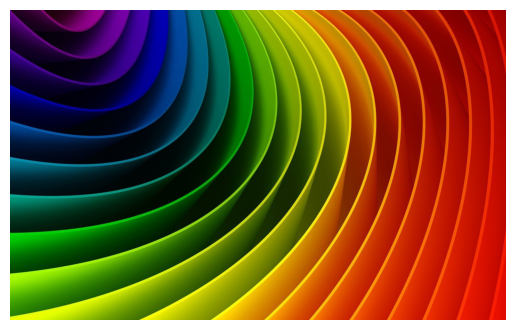

In [22]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


## view as a separate  plane as R,G,B

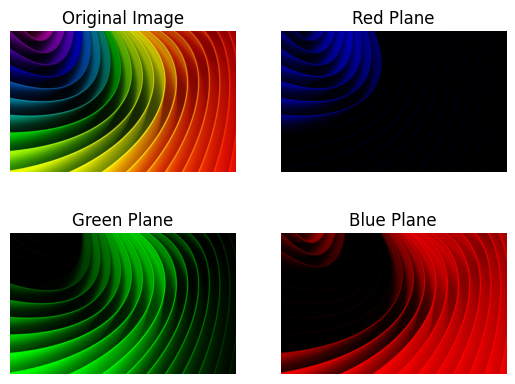

In [23]:

red_plane = image_rgb.copy()
red_plane[:, :, 0] = 0  
red_plane[:, :, 1] = 0 

green_plane = image_rgb.copy()
green_plane[:, :, 0] = 0  
green_plane[:, :, 2] = 0  

blue_plane = image_rgb.copy()
blue_plane[:, :, 1] = 0  
blue_plane[:, :, 2] = 0  


plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')


plt.subplot(2, 2, 2)
plt.imshow(red_plane)
plt.title("Red Plane")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(green_plane)
plt.title("Green Plane")
plt.axis('off')


plt.subplot(2, 2, 4)
plt.imshow(blue_plane)
plt.title("Blue Plane")
plt.axis('off')
plt.show()


## RGB to CMY image

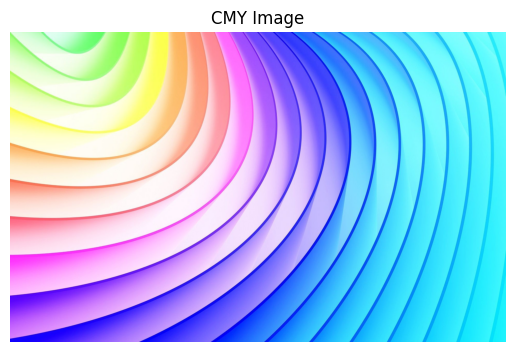

In [24]:

image_rgb_normalized = image_rgb / 255.0
cmy_image = 1 - image_rgb_normalized 
cmy_image = (cmy_image * 255).astype('uint8')

plt.imshow(cmy_image)
plt.axis('off')
plt.title("CMY Image")
plt.show()


## alternate code

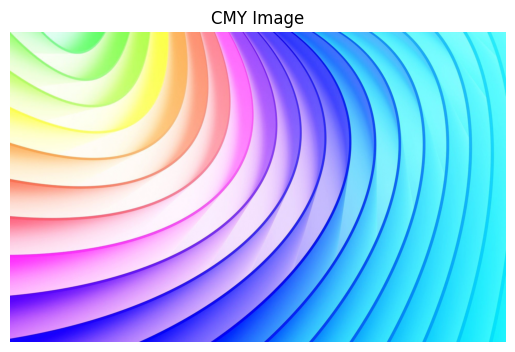

In [25]:
import numpy as np
image_rgb_normalized = image_rgb / 255.0


C = 1 - image_rgb_normalized[:, :, 0]
M = 1 - image_rgb_normalized[:, :, 1]
Y = 1 - image_rgb_normalized[:, :, 2]


K = np.min([C, M, Y])

plt.imshow(np.stack([C, M, Y], axis=-1))
plt.axis('off')
plt.title("CMY Image")
plt.show()


## RGB to HSV image

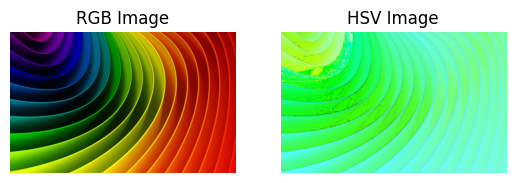

In [26]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)


plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("RGB Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_hsv)
plt.title("HSV Image")
plt.axis('off')

plt.show()

## manually

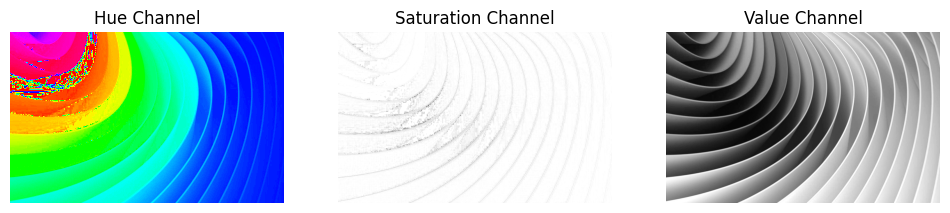

HSV values at pixel (100, 100): Hue = 158, Saturation = 237, Value = 140


In [27]:

hue, saturation, value = cv2.split(image_hsv)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(hue, cmap='hsv')
plt.title("Hue Channel")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(saturation,cmap='gray')
plt.title("Saturation Channel")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(value, cmap='gray')
plt.title("Value Channel")
plt.axis('off')

plt.show()

x, y = 100, 100  


pixel_hsv = image_hsv[y, x]
print(f"HSV values at pixel ({x}, {y}): Hue = {pixel_hsv[0]}, Saturation = {pixel_hsv[1]}, Value = {pixel_hsv[2]}")


## by visualizing with empty image or empty matrix

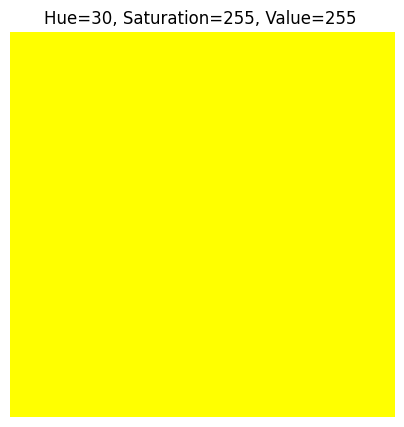

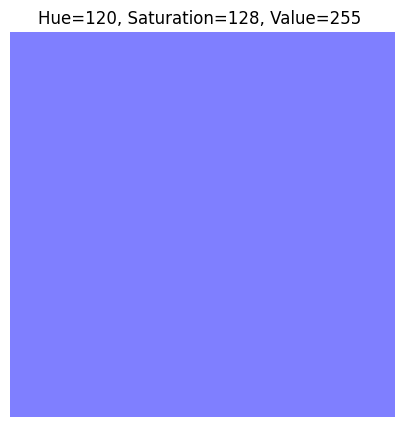

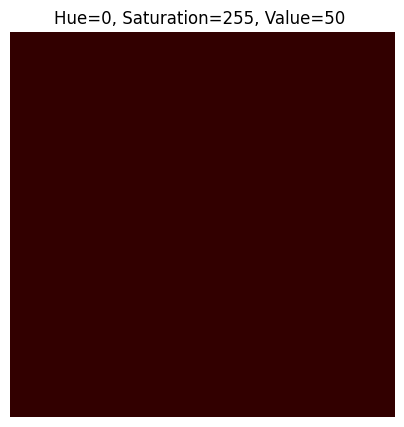

In [28]:
import numpy as np

height, width = 10, 10
image_hsv = np.zeros((height, width, 3), dtype=np.uint8)

image_hsv[:, :, 0] = 30  
image_hsv[:, :, 1] = 255  
image_hsv[:, :, 2] = 255  

image_bgr = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(image_bgr)
plt.title("Hue=30, Saturation=255, Value=255 ")
plt.axis('off')
plt.show()


image_hsv[:, :, 0] = 120  
image_hsv[:, :, 1] = 128  
image_hsv[:, :, 2] = 255  

image_bgr = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)


plt.figure(figsize=(5, 5))
plt.imshow(image_bgr)
plt.title("Hue=120, Saturation=128, Value=255 ")
plt.axis('off')
plt.show()


image_hsv[:, :, 0] = 0  
image_hsv[:, :, 1] = 255  
image_hsv[:, :, 2] = 50  

image_bgr = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)


plt.figure(figsize=(5, 5))
plt.imshow(image_bgr)
plt.title("Hue=0, Saturation=255, Value=50 ")
plt.axis('off')
plt.show()


## variations in HSV image

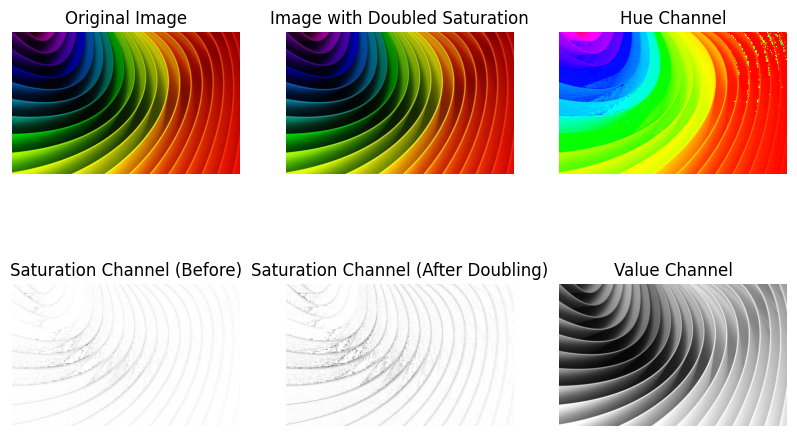

In [29]:

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

hue, saturation1, value = cv2.split(image_hsv)
saturation_before = saturation1.copy()
image_hsv[:, :, 1] = cv2.min(image_hsv[:, :, 1] * 2, 255)
hue,saturation2,value = cv2.split(image_hsv)
saturation_after = saturation2.copy()
image_rgb_modified = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)


plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_rgb_modified)
plt.title("Image with Doubled Saturation")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(hue, cmap='hsv')
plt.title("Hue Channel")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(saturation_before, cmap='gray')
plt.title("Saturation Channel (Before)")
plt.axis('off')


plt.subplot(2, 3, 5)
plt.imshow(saturation_after, cmap='gray')
plt.title("Saturation Channel (After Doubling)")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(value, cmap='gray')
plt.title("Value Channel")
plt.axis('off')

plt.show()


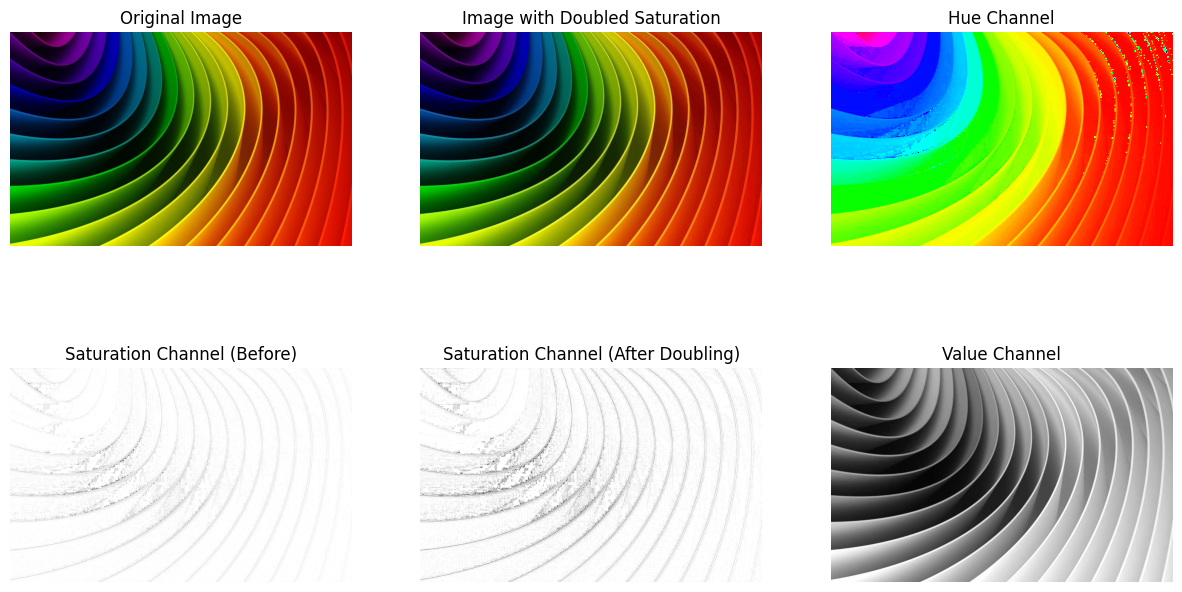

HSV values at pixel (100, 100):
Hue: 142
Saturation (Before): 237
Saturation (After Doubling): 218
Value: 140


In [30]:

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

hue, saturation1, value = cv2.split(image_hsv)

saturation_before = saturation1.copy()

image_hsv[:, :, 1] = cv2.min(image_hsv[:, :, 1] * 2, 255)

hue, saturation2, value = cv2.split(image_hsv)

saturation_after = saturation2.copy()

image_rgb_modified = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(15, 8))


plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')


plt.subplot(2, 3, 2)
plt.imshow(image_rgb_modified)
plt.title("Image with Doubled Saturation")
plt.axis('off')


plt.subplot(2, 3, 3)
plt.imshow(hue, cmap='hsv')
plt.title("Hue Channel")
plt.axis('off')


plt.subplot(2, 3, 4)
plt.imshow(saturation_before, cmap='gray')
plt.title("Saturation Channel (Before)")
plt.axis('off')


plt.subplot(2, 3, 5)
plt.imshow(saturation_after, cmap='gray')
plt.title("Saturation Channel (After Doubling)")
plt.axis('off')


plt.subplot(2, 3, 6)
plt.imshow(value, cmap='gray')
plt.title("Value Channel")
plt.axis('off')

plt.show()


x, y = 100, 100  


pixel_hue = hue[y, x]
pixel_saturation_before = saturation_before[y, x]
pixel_saturation_after = saturation_after[y, x]
pixel_value = value[y, x]


print(f"HSV values at pixel ({x}, {y}):")
print(f"Hue: {pixel_hue}")
print(f"Saturation (Before): {pixel_saturation_before}")
print(f"Saturation (After Doubling): {pixel_saturation_after}")
print(f"Value: {pixel_value}")


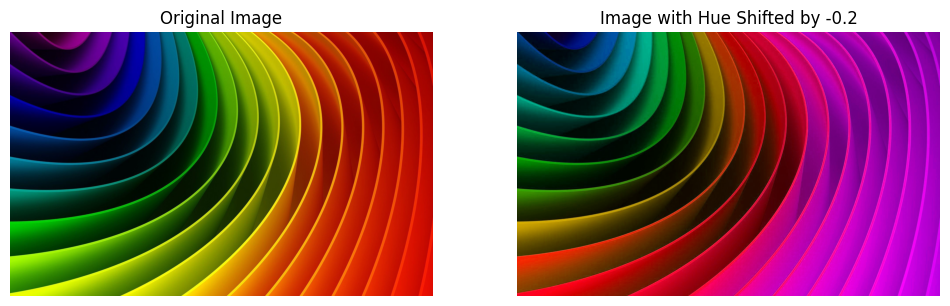

Original Hue value at pixel (100, 100): 142
Shifted Hue value at pixel (100, 100): 106.19999999999999


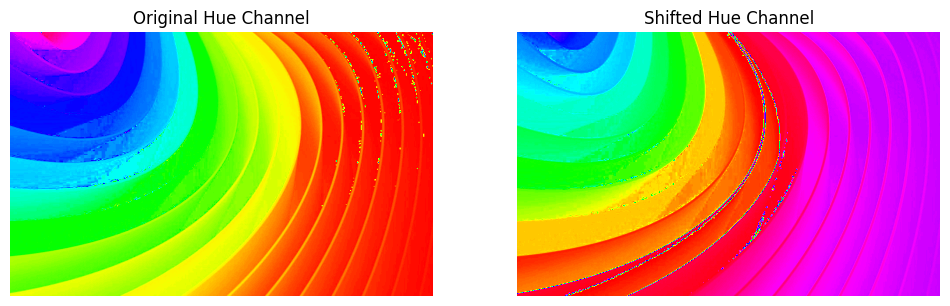

In [31]:

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


hue, saturation, value = cv2.split(image_hsv)

hue_shift = -0.2 * 179  


hue_after = (hue + hue_shift) % 180  

image_hsv_shifted = cv2.merge([hue_after.astype(np.uint8), saturation, value])


image_rgb_shifted = cv2.cvtColor(image_hsv_shifted, cv2.COLOR_HSV2RGB)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(image_rgb_shifted)
plt.title("Image with Hue Shifted by -0.2")
plt.axis('off')

plt.show()


x, y = 100, 100  

original_hue = hue[y, x]

shifted_hue = hue_after[y, x]


print(f"Original Hue value at pixel ({x}, {y}): {original_hue}")
print(f"Shifted Hue value at pixel ({x}, {y}): {shifted_hue}")


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(hue, cmap='hsv')
plt.title("Original Hue Channel")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(hue_after, cmap='hsv')
plt.title("Shifted Hue Channel")
plt.axis('off')

plt.show()


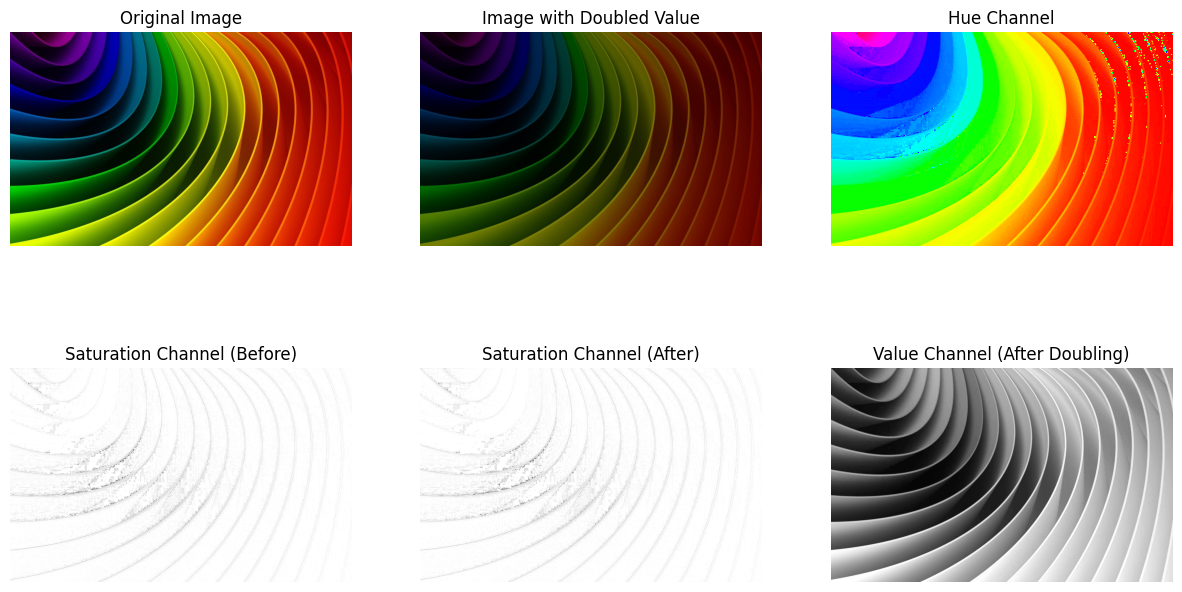

HSV values at pixel (100, 100):
Hue: 142
Saturation (Before): 237
Saturation (After): 237
Value (Before): 140
Value (After Doubling): 70


In [32]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

hue, saturation1, value = cv2.split(image_hsv)

saturation_before = saturation1.copy()

value_before = value.copy()
image_hsv[:, :, 2] = cv2.min(image_hsv[:, :, 2] / 2, 255)  
hue, saturation2, value = cv2.split(image_hsv)

value_after = value.copy()

image_rgb_modified = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_rgb_modified)
plt.title("Image with Doubled Value")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(hue, cmap='hsv')
plt.title("Hue Channel")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(saturation_before, cmap='gray')
plt.title("Saturation Channel (Before)")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(saturation2, cmap='gray')
plt.title("Saturation Channel (After)")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(value_after, cmap='gray')
plt.title("Value Channel (After Doubling)")
plt.axis('off')

plt.show()

x, y = 100, 100  

pixel_hue = hue[y, x]
pixel_saturation_before = saturation_before[y, x]
pixel_saturation_after = saturation2[y, x]
pixel_value_before = value_before[y, x]
pixel_value_after = value_after[y, x]

print(f"HSV values at pixel ({x}, {y}):")
print(f"Hue: {pixel_hue}")
print(f"Saturation (Before): {pixel_saturation_before}")
print(f"Saturation (After): {pixel_saturation_after}")
print(f"Value (Before): {pixel_value_before}")
print(f"Value (After Doubling): {pixel_value_after}")


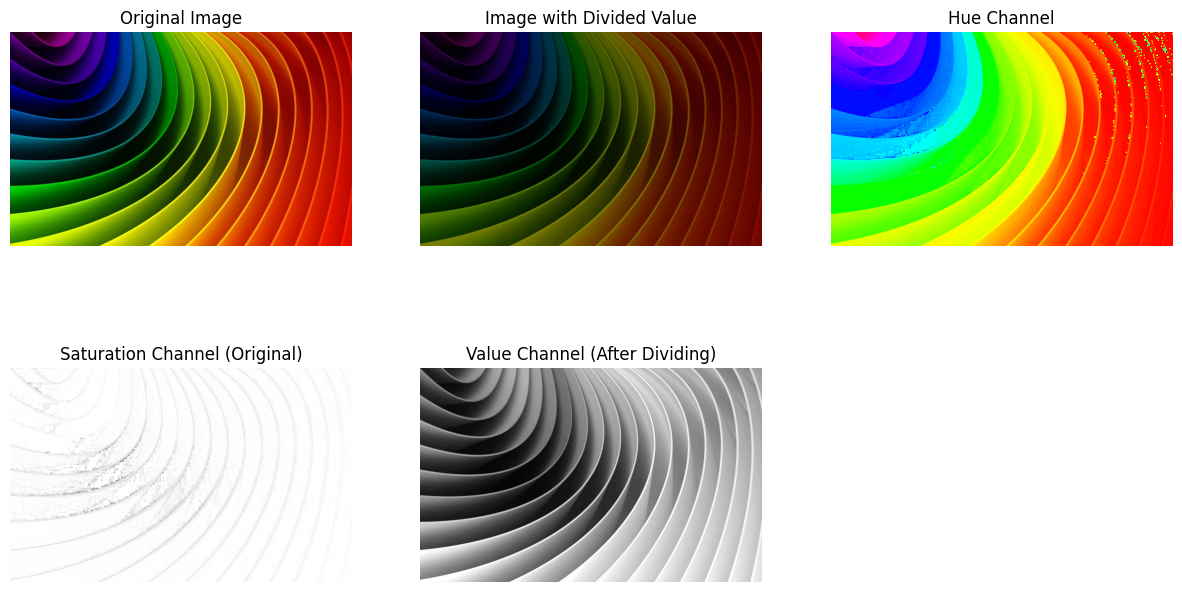

HSV values at pixel (100, 100):
Hue: 142
Saturation (Original): 237
Value (Before): 140
Value (After Doubling): 70


In [33]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

hue, saturation, value = cv2.split(image_hsv)
value_before = value.copy()
image_hsv[:, :, 2] = cv2.min(image_hsv[:, :, 2] / 2, 255)  

hue, saturation, value2 = cv2.split(image_hsv)

value_after = value2.copy()

image_rgb_modified = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

# Visualize the changes
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_rgb_modified)
plt.title("Image with Divided Value")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(hue, cmap='hsv')
plt.title("Hue Channel")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(saturation, cmap='gray')
plt.title("Saturation Channel (Original)")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(value, cmap='gray')
plt.title("value Channel ")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(value_after, cmap='gray')
plt.title("Value Channel (After Dividing)")
plt.axis('off')

plt.show()

x, y = 100, 100  

pixel_hue = hue[y, x]
pixel_saturation_before = saturation_before[y, x]
pixel_value_before = value_before[y, x]
pixel_value_after = value_after[y, x]

print(f"HSV values at pixel ({x}, {y}):")
print(f"Hue: {pixel_hue}")
print(f"Saturation (Original): {pixel_saturation_before}")
print(f"Value (Before): {pixel_value_before}")
print(f"Value (After Doubling): {pixel_value_after}")


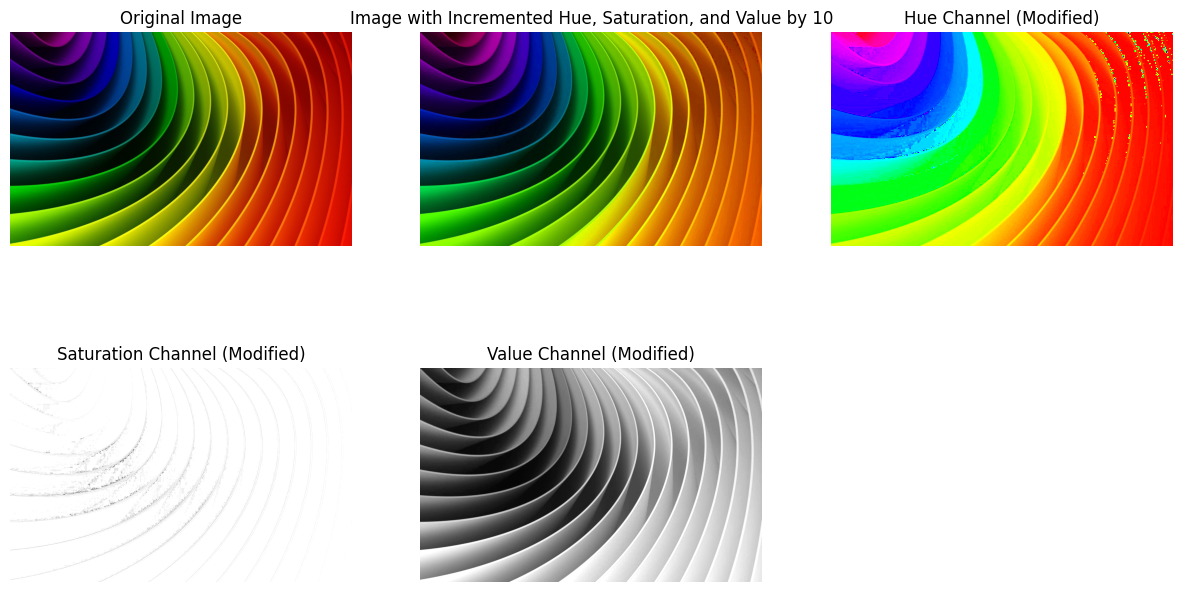

HSV values at pixel (100, 100):
Hue (After Increment): 152
Saturation (Original): 237
Saturation (After Increment): 247
Value (Before Increment): 140
Value (After Increment): 150


In [34]:
increment_value = 10 


image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

hue, saturation, value = cv2.split(image_hsv)

saturation_before = saturation.copy()
value_before = value.copy()

hue = cv2.add(hue, increment_value)
saturation = cv2.add(saturation, increment_value)  
value = cv2.add(value, increment_value)  

hue = cv2.min(hue, 179)  
saturation = cv2.min(saturation, 255)
value = cv2.min(value, 255)

image_hsv = cv2.merge([hue, saturation, value])

image_rgb_modified = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_rgb_modified)
plt.title(f"Image with Incremented Hue, Saturation, and Value by {increment_value}")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(hue, cmap='hsv')
plt.title("Hue Channel (Modified)")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(saturation, cmap='gray')
plt.title("Saturation Channel (Modified)")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(value, cmap='gray')
plt.title("Value Channel (Modified)")
plt.axis('off')

plt.show()

x, y = 100, 100  

pixel_hue = hue[y, x]
pixel_saturation_before = saturation_before[y, x]
pixel_saturation_after = saturation[y, x]
pixel_value_before = value_before[y, x]
pixel_value_after = value[y, x]

print(f"HSV values at pixel ({x}, {y}):")
print(f"Hue (After Increment): {pixel_hue}")
print(f"Saturation (Original): {pixel_saturation_before}")
print(f"Saturation (After Increment): {pixel_saturation_after}")
print(f"Value (Before Increment): {pixel_value_before}")
print(f"Value (After Increment): {pixel_value_after}")


## RGB to YIQ image

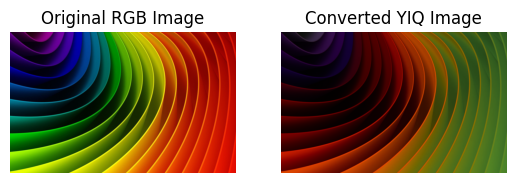

In [35]:

image_rgb = image_rgb / 255.0
    
transformation_matrix = np.array([
        [0.299,  0.587,  0.114],
        [0.5957, -0.2746, -0.3213],
        [0.2115, -0.5227,  0.3113]
    ])
    
reshaped_image = image_rgb.reshape(-1, 3)
    
yiq_image = reshaped_image.dot(transformation_matrix.T)
    
yiq_image = yiq_image.reshape(image_rgb.shape)
    
yiq_image = np.clip(yiq_image * 255, 0, 255).astype(np.uint8)
    
plt.subplot(1, 2, 1)

plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(yiq_image)
plt.title("Converted YIQ Image")
plt.axis('off')

plt.show()


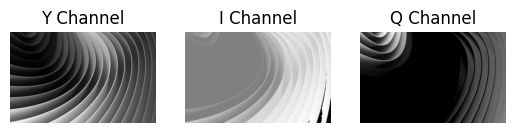

In [36]:
    Y = yiq_image[:, :, 0]  # Y channel
    I = yiq_image[:, :, 1]  # I channel
    Q = yiq_image[:, :, 2]  # Q channel
    
    
    I = np.clip(I + 128, 0, 255)  
    Q = np.clip(Q + 128, 0, 255)  # Shift Q channel to positive values
    
    # Display the Y channel
    plt.subplot(1, 3, 1)
    plt.imshow(Y, cmap='gray')
    plt.title("Y Channel")
    plt.axis('off')
    
    # Display the I channel
    plt.subplot(1, 3, 2)
    plt.imshow(I, cmap='gray')
    plt.title("I Channel")
    plt.axis('off')
    
    # Display the Q channel
    plt.subplot(1, 3, 3)
    plt.imshow(Q, cmap='gray')
    plt.title("Q Channel")
    plt.axis('off')
    
    plt.show()
